In [71]:
# random seed
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [72]:
# load data
from tensorflow.keras import datasets
(X_train0, y_train0), (X_test0, y_test0) = datasets.mnist.load_data()

X_train0.shape, y_train0.shape, X_test0.shape, y_train0.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

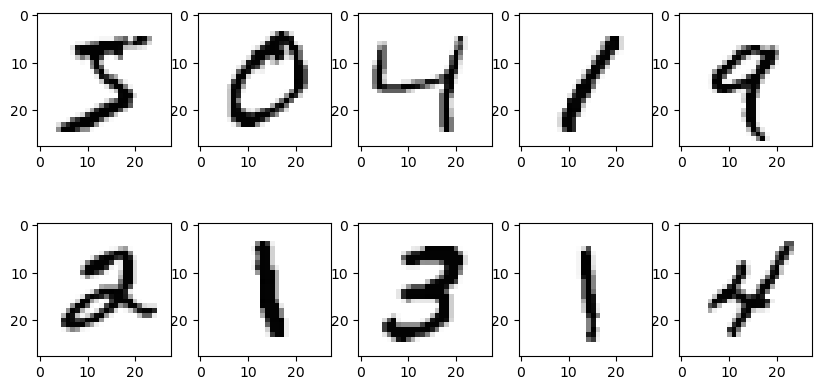

In [73]:
# visualize original data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train0[i].reshape((28,28)),
               cmap='Greys')
plt.show()

In [74]:
# target class
print(set(y_train0))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [75]:
# scaling
X_train_re = X_train0.reshape(60000, 28, 28, 1)
X_train = X_train_re/255
print(X_train.shape)

X_test_re = X_test0.reshape(10000, 28, 28, 1)
X_test = X_test_re/255
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [76]:
# one-hot encoding(target)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train0)
y_test = to_categorical(y_test0)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [77]:
# create CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(set(y_train0))
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), # 합성층 추가 #
                 input_shape = (28, 28, 1),
                 padding = 'valid',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3,3),
                 padding='valid',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 32)         

In [78]:
# model compile
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

# training
hist = model.fit(X_train, y_train, epochs=3, batch_size = 100)

Epoch 1/3


2024-01-30 07:11:16.382773: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


600/600 [==============================] - 5s 6ms/step - loss: 0.2203 - accuracy: 0.9310
Epoch 2/3
600/600 [==============================] - 4s 6ms/step - loss: 0.0754 - accuracy: 0.9765
Epoch 3/3
600/600 [==============================] - 4s 6ms/step - loss: 0.0565 - accuracy: 0.9827


In [79]:
# model evaluation
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_test, y_test)[1])

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0263 - accuracy: 0.9919
0.9919166564941406
313/313 [==============================] - 1s 4ms/step - loss: 0.0279 - accuracy: 0.9902
0.9901999831199646


In [80]:
# missing index
y_pred_hot = model.predict(X_test)
print(y_pred_hot[0])

import numpy as np
y_pred = np.argmax(y_pred_hot, axis = 1)
print(y_pred)

diff = y_test0 - y_pred
diff_idx = []
y_len = len(y_test0)
for i in range(0, y_len):
    if(diff[i] != 0):
        diff_idx.append(i)

313/313 [==============================] - 1s 3ms/step
[6.95724189e-09 2.15016385e-07 1.27951807e-06 2.04428106e-05
 1.00112265e-08 3.45792905e-08 1.21333377e-11 9.99962687e-01
 1.67705522e-07 1.52595730e-05]
[7 2 1 ... 4 5 6]


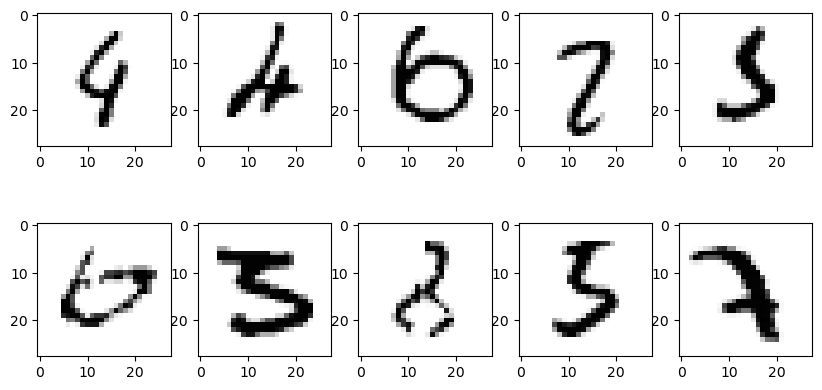

In [81]:
# visualize missing data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_test0[raw_idx].reshape((28, 28)),
               cmap = 'Greys')
plt.show()